In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')


In [2]:
data = pd.read_csv(r"C:\Users\Owner\Desktop\python\data sets\zomato\zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data.shape

(51717, 17)

In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Data Cleaning

In [7]:
df = data
df = df.drop(['url' , 'address' , 'phone' , 'menu_item' , 'dish_liked' , 'reviews_list'] , axis = 1)

In [8]:
df.shape

(51717, 11)

there may be some duplicate rows in our dataset so 
we have to remove those from our data set

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.shape

(51609, 11)

Celaning the Rate column

In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
df.rate.nunique()

64

In [13]:
# df.rate.str.split('/')

In [14]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51609, dtype: object

In [15]:
def handelrate(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

df['rate'] = df['rate'].apply(handelrate)
df.rate.head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

finding the null values in the column with mean

In [16]:
df['rate'].isnull().sum()

10019

In [17]:
df['rate'] = df['rate'].fillna(df['rate'].mean())

In [18]:
df['rate'].isnull().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [20]:
df.dropna(inplace = True)
df.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari


In [21]:
df.shape

(51042, 11)

In [22]:
df.rename(columns = {'approx_cost(for two people)' : 'Cost2plates' , 'listed_in(type)' : 'Type'}, inplace = True)

In [23]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'listed_in(city)'],
      dtype='object')

In [24]:
df.rename(columns = {'listed_in(city)' : 'City'}, inplace = True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'Cost2plates', 'Type', 'City'],
      dtype='object')

In [27]:
df.location.unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [28]:
df.City.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [29]:
df = df.drop(['City'] , axis = 1)

In [30]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [31]:
def handelcomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',' , '')
        return float(value)
    else:
        return float(value)

df['Cost2plates'] = df['Cost2plates'].apply(handelcomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

cleaning the rest type Column

In [32]:
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet


In [33]:
df = df.rename(columns  = {'rest_type' : 'Rest_type'})

In [37]:
rest_types = df['Rest_type'].value_counts()

In [40]:
rest_type_lessthan1000 = rest_types[rest_types < 1000]
rest_type_lessthan1000 

Rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

making rest types less than 1000 as others

In [43]:
def handel_rest_type(value):
    if(value in rest_type_lessthan1000):
        return 'others'
    else:
        return value

df['Rest_type'] = df['Rest_type'].apply(handel_rest_type)
df['Rest_type'].value_counts()

Rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

clean the location column

In [44]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [45]:
location = df['location'].value_counts()

In [46]:
location_lesstha300 = location[location < 300]

In [50]:
def handel_location(value):
    if(value in location_lesstha300):
        return 'others'
    else:
        return value

df['location'] = df['location'].apply(handel_location)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

Cleaning Cuisines column

In [54]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [55]:
df['cuisines'].value_counts()

cuisines
North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: count, Length: 2704, dtype: int64

In [56]:
cusines = df['cuisines'].value_counts()
cusines_lessthan100 = cusines[cusines < 100]

def handel_cusines(value):
    if(value in cusines_lessthan100):
        return 'others'
    else:
        return value

df['cuisines'] = df['cuisines'].apply(handel_cusines)
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [57]:
df.head()

,name,online_order,book_table,rate,votes,location,Rest_type,cuisines,Cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [58]:
df['Type'].value_counts()

Type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

In [ ]:
# types = df['Type'].value.counts()
# types_lessthan2000 = types[types < 2000]

# def handel_types(values):
#     if(value in types):
#         return 'others'
#     else:
#         return value

# df['Type'] = df['Type'].apply(handel_types)
# df['Type'].value_counts

Visualizaing data

Count Plots of various Locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

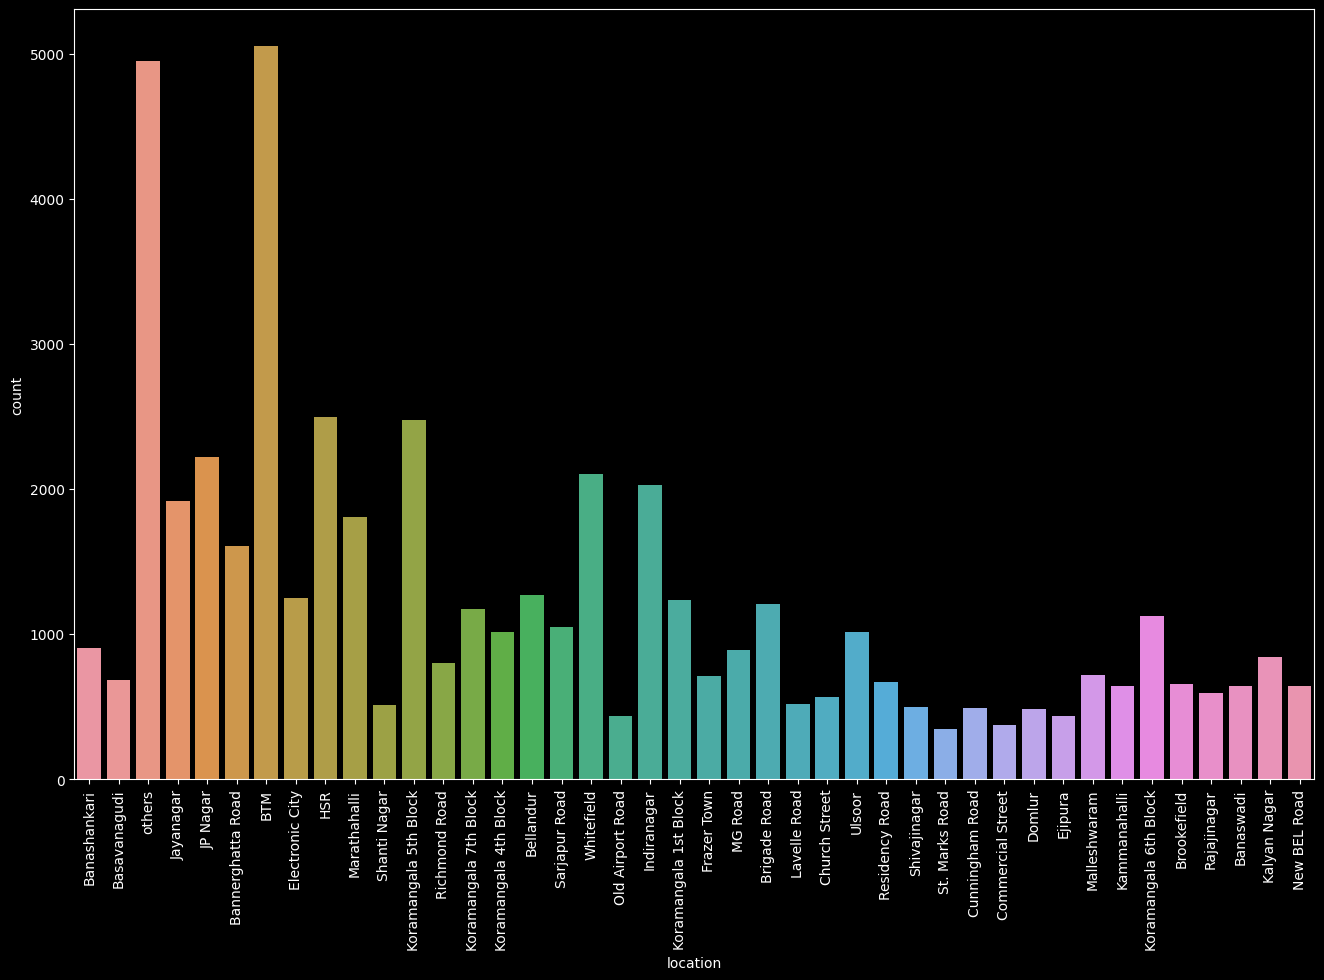

In [61]:
plt.figure(figsize= (16,10))
ax = sns.countplot(data = df , x = 'location')
plt.xticks(rotation = 90)

Visualizing the Online Order

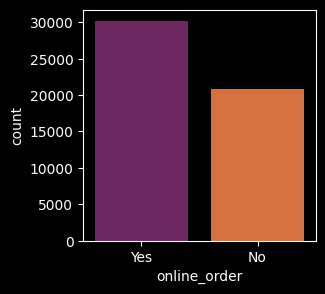

In [64]:
plt.figure(figsize= (3,3))
sns.countplot(data = df , x = 'online_order' , palette = 'inferno')
plt.show()

Visualizing the Book Table

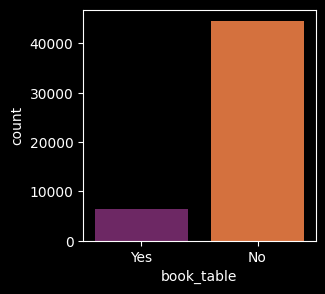

In [65]:
plt.figure(figsize=(3,3))
sns.countplot(data = df , x = 'book_table' , palette = 'inferno')
plt.show()

visualizing the Online Order vs Rate

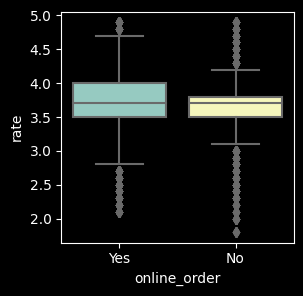

In [68]:
plt.figure(figsize=(3,3))
sns.boxplot(data = df , x = 'online_order' , y = 'rate')
plt.show()

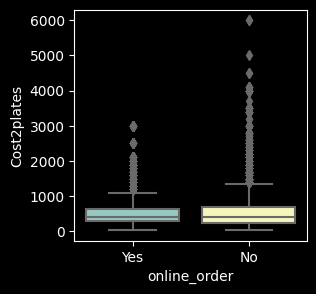

In [76]:
plt.figure(figsize=(3,3))
sns.boxplot(data = df , y = 'Cost2plates' , x = 'online_order')
plt.show()

Visualizing the book Table vs Rate

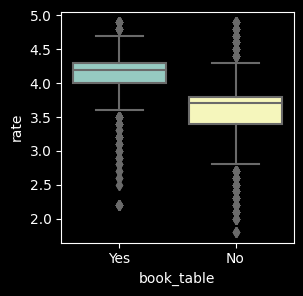

In [78]:
plt.figure(figsize=(3,3))
sns.boxplot(data = df , x = 'book_table' , y = 'rate')
plt.show()

Visualizing the Online Order facility location wise

In [ ]:
df1 = df['location'].

In [82]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'Rest_type', 'cuisines', 'Cost2plates', 'Type'],
      dtype='object')

Visualizing the Types of resturants bs rate


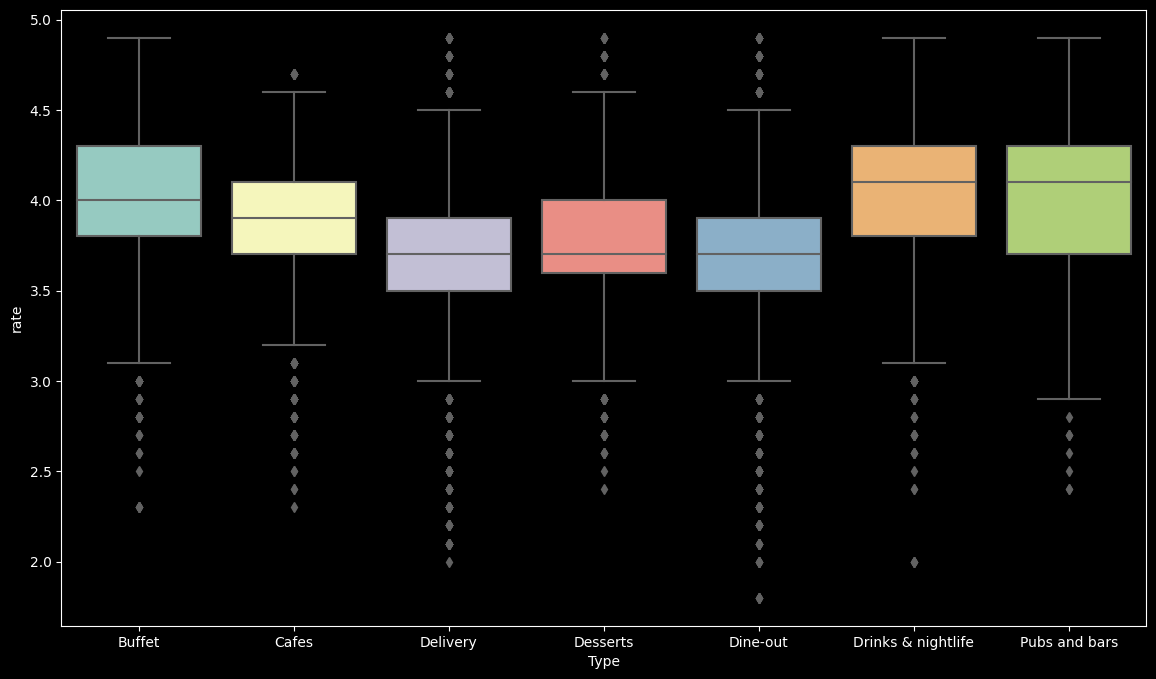

In [83]:
plt.figure(figsize=(14,8))
sns.boxplot(data = df , x = 'Type' , y = 'rate')
plt.show()

No. of votes location wise

In [84]:
df1 = df[['location' , 'votes']]
df1.drop_duplicates()

,location,votes
0,Banashankari,775
1,Banashankari,787
2,Banashankari,918
3,Banashankari,88
4,Basavanagudi,166
...,...,...
51328,Whitefield,152
51547,Whitefield,203
51606,others,848
51628,Bellandur,411


In [109]:
df2 = df1.groupby(['location'])['votes'].sum()

In [110]:
df2 = df2.to_frame()
df2 = df2.sort_values('votes' , ascending = False)
df2.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

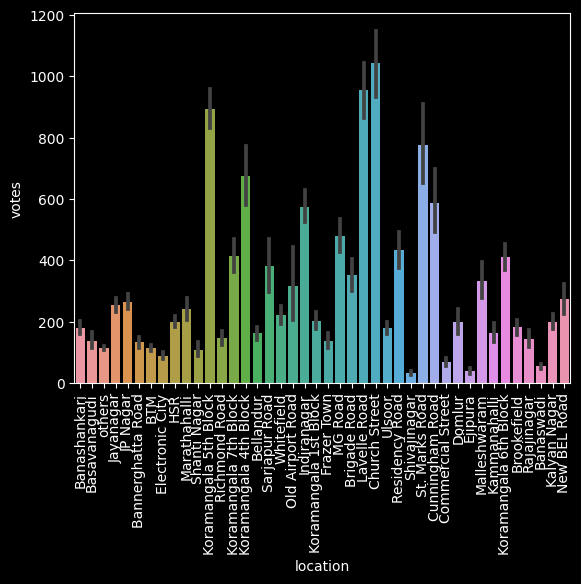

In [116]:
sns.barplot(data=df1,x=df1["location"],y=df1["votes"])
plt.xticks(rotation = 90)

In [111]:
# plt.figure(figsize=(15,8))
# sns.barplot(data = df2 , x = 'location' , y ='votes')
# plt.xticks(rotation = 90)

In [125]:
df3 = df1.groupby(['location'])['votes'].sum()

In [145]:
df4=df3.to_frame()
df4.sort_values(by = 'votes' , ascending = False)

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522
BTM,573668
others,563807
HSR,498322
Lavelle Road,495777


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'BTM'),
  Text(1, 0, 'Banashankari'),
  Text(2, 0, 'Banaswadi'),
  Text(3, 0, 'Bannerghatta Road'),
  Text(4, 0, 'Basavanagudi'),
  Text(5, 0, 'Bellandur'),
  Text(6, 0, 'Brigade Road'),
  Text(7, 0, 'Brookefield'),
  Text(8, 0, 'Church Street'),
  Text(9, 0, 'Commercial Street'),
  Text(10, 0, 'Cunningham Road'),
  Text(11, 0, 'Domlur'),
  Text(12, 0, 'Ejipura'),
  Text(13, 0, 'Electronic City'),
  Text(14, 0, 'Frazer Town'),
  Text(15, 0, 'HSR'),
  Text(16, 0, 'Indiranagar'),
  Text(17, 0, 'JP Nagar'),
  Text(18, 0, 'Jayanagar'),
  Text(19, 0, 'Kalyan Nagar'),
  Text(20, 0, 'Kammanahalli'),
  Text(21, 0, 'Koramangala 1st Block'),
  Text(22, 0, 'Koramangala 4th Block'),
  Text(23, 0, 'Koramangala 5th Block'),
  Text(24, 0, 'Koramangala 6th Block'),
  Text(25, 0, 'Koramangala 7th Bl

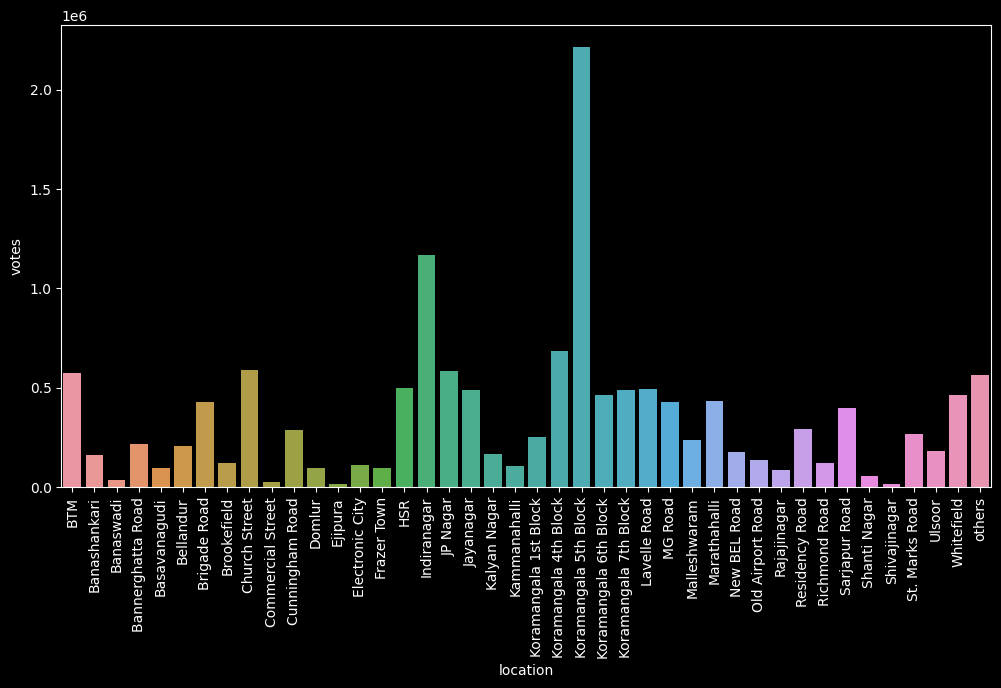

In [153]:
plt.figure(figsize=(12,6))
sns.barplot(data=df4,x=df4.index , y=df4['votes'])
plt.xticks(rotation = 90)

Visualizing top cusings

In [164]:
df_1 = df[['cuisines' , 'votes']]
df1.drop_duplicates()
df_2 = df_1.groupby(['cuisines'])['votes'].sum()
df_2 = df_2.to_frame()
df_2.sort_values('votes' , ascending = False)
df_2 = df_2.iloc[:-2 , :]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]),
 [Text(0, 0, 'Andhra'),
  Text(1, 0, 'Andhra, Biryani'),
  Text(2, 0, 'Arabian'),
  Text(3, 0, 'Bakery'),
  Text(4, 0, 'Bakery, Desserts'),
  Text(5, 0, 'Bakery, Fast Food'),
  Text(6, 0, 'Beverages'),
  Text(7, 0, 'Beverages, Desserts'),
  Text(8, 0, 'Beverages, Fast Food'),
  Text(9, 0, 'Biryani'),
  Text(10, 0, 'Biryani, Fast Food'),
  Text(11, 0, 'Biryani, Kebab'),
  Text(12, 0, 'Biryani, North Indian'),
  Text(13, 0, 'Biryani, North Indian, Chinese'),
  Text(14, 0, 'Biryani, South Indian'),
  Text(15, 0, 'Burger, Fast Food'),
  Text(16, 0, 'Cafe'),
  Text(17, 0, 'Cafe, Bakery'),
  Text(18, 0, 'Cafe, Continental'),
  Text(19, 0, 'Cafe, Desserts'),
  Text(20, 0, 'Cafe, Fast Food'),


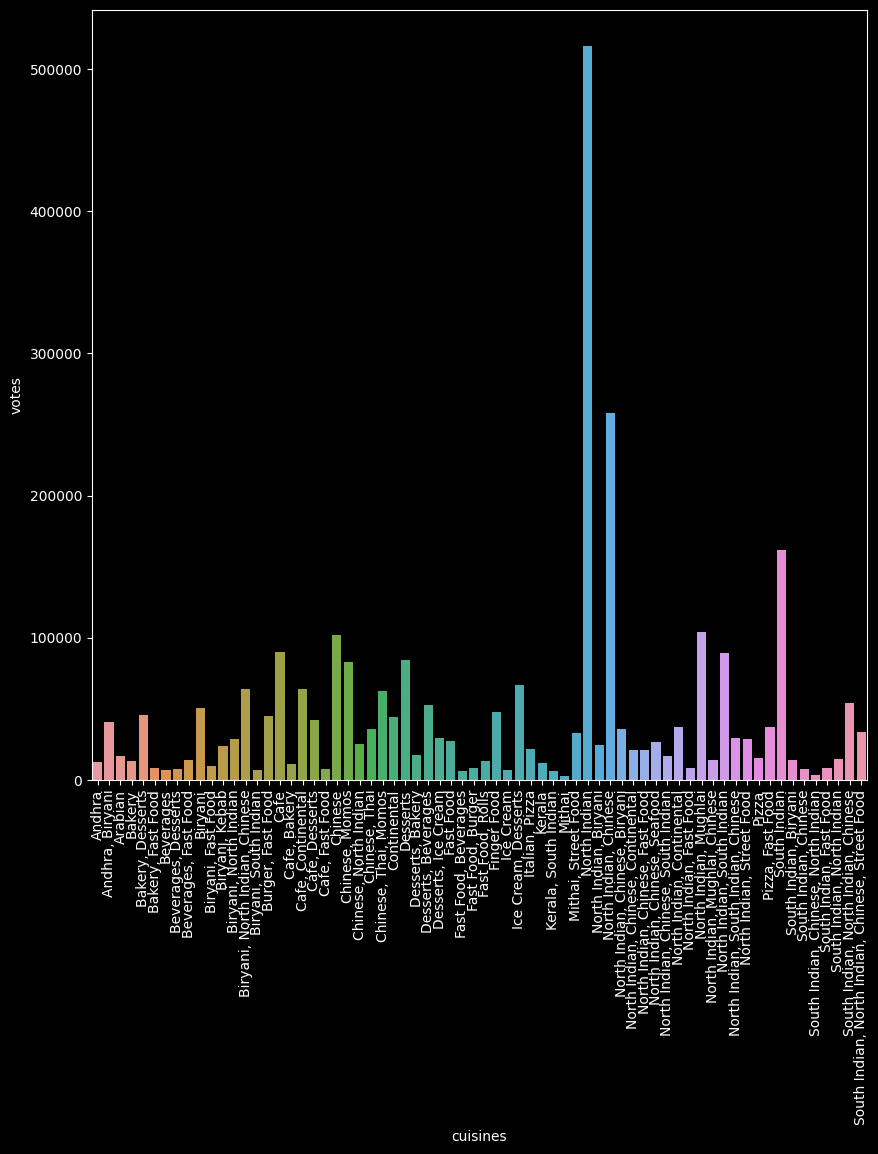

In [169]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_2,x=df_2.index , y=df_2['votes'])
plt.xticks(rotation = 90)